In [1]:
import findspark
findspark.init('/home/user/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS_CSV').getOrCreate()

In [2]:
df = spark.read.load('./Sales_data/sales.csv',format='csv',header='true')

In [3]:
df.show()

+---+----+---------------+-------+------+--------------------+-----------------+--------------------+-------------+----------------+-------------+----------+--------------+----------+-----------+------------+-------+------------+
| ID|Year|   Product Name|   Unit|Region|Sales Representative|    Hospital Name|  Hospital Attribute|Hospital Code|Purchasing Price|Selling Price|       IMF|Hospital Class|Department|Client Name|Sales Volume|Profits|Satisfaction|
+---+----+---------------+-------+------+--------------------+-----------------+--------------------+-------------+----------------+-------------+----------+--------------+----------+-----------+------------+-------+------------+
|  1|2016|Corbrin Capsule|Dept. 2| Wuhan|                  熊婷|华中科技大学同济医学院附属协和医院|Ministerial hospital|         ADXH|           47.14|        63.14|1571181790|   Third Class|       肾内科|        邓安国|         236|   3776|           Y|
|  2|2016|Corbrin Capsule|Dept. 2| Wuhan|                  熊婷|华中科技大学同济医学院附属协和医院|

In [5]:
df.describe().show()

+-------+------------------+------+-----------------+--------------------+--------+--------------------+--------------------+------------------+-------------+------------------+------------------+-------------------+--------------------+----------+-----------+------------------+------------------+------------+
|summary|                ID|  Year|     Product Name|                Unit|  Region|Sales Representative|       Hospital Name|Hospital Attribute|Hospital Code|  Purchasing Price|     Selling Price|                IMF|      Hospital Class|Department|Client Name|      Sales Volume|           Profits|Satisfaction|
+-------+------------------+------+-----------------+--------------------+--------+--------------------+--------------------+------------------+-------------+------------------+------------------+-------------------+--------------------+----------+-----------+------------------+------------------+------------+
|  count|             40285| 40285|            40285|           

In [6]:
df.describe().toPandas()

,summary,ID,Year,Product Name,Unit,Region,Sales Representative,Hospital Name,Hospital Attribute,Hospital Code,Purchasing Price,Selling Price,IMF,Hospital Class,Department,Client Name,Sales Volume,Profits,Satisfaction
0,count,40285,40285,40285,40285,40285,40285,40285,40285,40278,40285,40285,40285,40285,40285,40285,40285,40285,40285
1,mean,20143.0,2016.0,None,None,None,None,None,None,None,103.08261710312793,123.35535137145247,3.579297056289609E8,None,None,None,17.451654497697657,234.69782905826548,None
2,stddev,11629.422133823617,0.0,None,None,None,None,None,None,None,202.5194858147072,227.76194477159137,5.275965922114302E8,None,None,None,59.636557423864204,914.4112274804916,None
3,min,1,2016,Acarbose Tablet,Cys.,Huangshi,付浩,16化建Worker's hospital,Community hospital,ACDXHJJL,15.35,1047.64,100420557.8,Second Class - Township,内分泌科,117社区,-1,-0.81,N
4,max,9999,2016,Voglibose Capsule,Endocrine Health Dept. 3,Yichang,龚鑫,龙泉卫生院,Worker's hospital,无,917.62,97.76,无,Third Class,风湿科,龚龙,999,997.92,Y


In [7]:
df.toPandas().describe()

,ID,Year,Product Name,Unit,Region,Sales Representative,Hospital Name,Hospital Attribute,Hospital Code,Purchasing Price,Selling Price,IMF,Hospital Class,Department,Client Name,Sales Volume,Profits,Satisfaction
count,40285,40285,40285,40285,40285,40285,40285,40285,40278,40285,40285,40285,40285,40285,40285,40285,40285,40285
unique,40285,1,9,8,9,181,457,8,468,9,10,308,4,46,11995,624,1463,2
top,75,2016,Corbrin Capsule,Dept. 2,Wuhan,李小芬,华中科技大学同济医学院附属协和医院,Municipal hospital,ADXH,47.14,63.14,无,Third Class,内科,张静,0,0,N
freq,1,40285,15629,8005,17627,908,1950,16902,1950,15629,15629,1981,26826,5450,38,13093,13093,38238


In [8]:
df.columns

['ID',
 'Year',
 'Product Name',
 'Unit',
 'Region',
 'Sales Representative',
 'Hospital Name',
 'Hospital Attribute',
 'Hospital Code',
 'Purchasing Price',
 'Selling Price',
 'IMF',
 'Hospital Class',
 'Department',
 'Client Name',
 'Sales Volume',
 'Profits',
 'Satisfaction']

In [9]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Sales Representative: string (nullable = true)
 |-- Hospital Name: string (nullable = true)
 |-- Hospital Attribute: string (nullable = true)
 |-- Hospital Code: string (nullable = true)
 |-- Purchasing Price: string (nullable = true)
 |-- Selling Price: string (nullable = true)
 |-- IMF: string (nullable = true)
 |-- Hospital Class: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Client Name: string (nullable = true)
 |-- Sales Volume: string (nullable = true)
 |-- Profits: string (nullable = true)
 |-- Satisfaction: string (nullable = true)



In [10]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40285 entries, 0 to 40284
Data columns (total 18 columns):
ID                      40285 non-null object
Year                    40285 non-null object
Product Name            40285 non-null object
Unit                    40285 non-null object
Region                  40285 non-null object
Sales Representative    40285 non-null object
Hospital Name           40285 non-null object
Hospital Attribute      40285 non-null object
Hospital Code           40278 non-null object
Purchasing Price        40285 non-null object
Selling Price           40285 non-null object
IMF                     40285 non-null object
Hospital Class          40285 non-null object
Department              40285 non-null object
Client Name             40285 non-null object
Sales Volume            40285 non-null object
Profits                 40285 non-null object
Satisfaction            40285 non-null object
dtypes: object(18)
memory usage: 5.5+ MB


In [11]:
print('The total number of NaN in the dataframe:')
(df.toPandas().drop(columns=['Hospital Code'])).isnull().sum()

The total number of NaN in the dataframe:


ID                      0
Year                    0
Product Name            0
Unit                    0
Region                  0
Sales Representative    0
Hospital Name           0
Hospital Attribute      0
Purchasing Price        0
Selling Price           0
IMF                     0
Hospital Class          0
Department              0
Client Name             0
Sales Volume            0
Profits                 0
Satisfaction            0
dtype: int64

In [12]:
print('Sales Volumn that is below 0')
rawdata = df.toPandas()
print(rawdata[rawdata['Sales Volume'] < '0'])

Sales Volumn that is below 0
          ID  Year     Product Name     Unit   Region Sales Representative  \
415      416  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
418      419  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
419      420  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
439      440  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
443      444  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
464      465  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
478      479  2016  Corbrin Capsule  Dept. 2    Wuhan                   张惠   
1957    1958  2016  Corbrin Capsule  Dept. 2  Yichang                  官兴亮   
1958    1959  2016  Corbrin Capsule  Dept. 2  Yichang                  官兴亮   
1967    1968  2016  Corbrin Capsule  Dept. 2  Yichang                  官兴亮   
1972    1973  2016  Corbrin Capsule  Dept. 2  Yichang                  官兴亮   
1973    1974  2016  Corbrin Capsule

In [13]:
rawdata = df.toPandas()
print('Description of The Dataframe')
rawdata.describe()


Description of The Dataframe


,ID,Year,Product Name,Unit,Region,Sales Representative,Hospital Name,Hospital Attribute,Hospital Code,Purchasing Price,Selling Price,IMF,Hospital Class,Department,Client Name,Sales Volume,Profits,Satisfaction
count,40285,40285,40285,40285,40285,40285,40285,40285,40278,40285,40285,40285,40285,40285,40285,40285,40285,40285
unique,40285,1,9,8,9,181,457,8,468,9,10,308,4,46,11995,624,1463,2
top,75,2016,Corbrin Capsule,Dept. 2,Wuhan,李小芬,华中科技大学同济医学院附属协和医院,Municipal hospital,ADXH,47.14,63.14,无,Third Class,内科,张静,0,0,N
freq,1,40285,15629,8005,17627,908,1950,16902,1950,15629,15629,1981,26826,5450,38,13093,13093,38238


In [14]:
rawdata['Profits']

0           3776
1           5072
2           4592
3           2560
4           1920
5           1104
6           2064
7           2752
8           3392
9           4960
10          2448
11           288
12             0
13             0
14          3536
15             0
16          9488
17         17760
18           336
19           336
20             0
21           160
22          2176
23             0
24             0
25            16
26           256
27           288
28           976
29             0
          ...   
40255          0
40256          0
40257          0
40258          0
40259          0
40260          0
40261          0
40262          0
40263          0
40264          0
40265          0
40266     301.89
40267     402.52
40268    1106.93
40269     301.89
40270          0
40271     402.52
40272          0
40273          0
40274          0
40275     100.63
40276     100.63
40277          0
40278     100.63
40279          0
40280          0
40281     301.89
40282     100.

In [15]:
rawdata = df.toPandas()
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40285 entries, 0 to 40284
Data columns (total 18 columns):
ID                      40285 non-null object
Year                    40285 non-null object
Product Name            40285 non-null object
Unit                    40285 non-null object
Region                  40285 non-null object
Sales Representative    40285 non-null object
Hospital Name           40285 non-null object
Hospital Attribute      40285 non-null object
Hospital Code           40278 non-null object
Purchasing Price        40285 non-null object
Selling Price           40285 non-null object
IMF                     40285 non-null object
Hospital Class          40285 non-null object
Department              40285 non-null object
Client Name             40285 non-null object
Sales Volume            40285 non-null object
Profits                 40285 non-null object
Satisfaction            40285 non-null object
dtypes: object(18)
memory usage: 5.5+ MB


In [113]:
#The original dataframe
print(rawdata)
print('-----------------------------')
print('Columns',rawdata.columns)
print('-----------------------------')
print('Shape',rawdata.shape)

          ID  Year     Product Name     Unit    Region Sales Representative  \
0          1  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
1          2  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
2          3  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
3          4  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
4          5  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
5          6  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
6          7  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
7          8  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
8          9  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
9         10  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
10        11  2016  Corbrin Capsule  Dept. 2     Wuhan                   熊婷   
11        12  2016  Corbrin Capsule  Dept. 2     Wuh

In [16]:
#3.1.2
#import the necessary module
import pandas
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert numeric objects to numerals
rawdata['ID']=pandas.to_numeric(rawdata['ID'])
rawdata['Year']=pandas.to_numeric(rawdata['Year'])
rawdata['Purchasing Price']=pandas.to_numeric(rawdata['Purchasing Price'])
rawdata['Selling Price']=pandas.to_numeric(rawdata['Selling Price'])
rawdata['Sales Volume']=pandas.to_numeric(rawdata['Sales Volume'])
rawdata['Profits']=pandas.to_numeric(rawdata['Profits'])

rawdata.dtypes

ID                        int64
Year                      int64
Product Name             object
Unit                     object
Region                   object
Sales Representative     object
Hospital Name            object
Hospital Attribute       object
Hospital Code            object
Purchasing Price        float64
Selling Price           float64
IMF                      object
Hospital Class           object
Department               object
Client Name              object
Sales Volume            float64
Profits                 float64
Satisfaction             object
dtype: object

In [88]:
#3.1.2
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
rawdata['Product Name'] = le.fit_transform(rawdata['Product Name'])
rawdata['Unit'] = le.fit_transform(rawdata['Unit'])
rawdata['Region'] = le.fit_transform(rawdata['Region'])
rawdata['Sales Representative'] = le.fit_transform(rawdata['Sales Representative'])
rawdata['Hospital Name'] = le.fit_transform(rawdata['Hospital Name'])
rawdata['Hospital Attribute'] = le.fit_transform(rawdata['Hospital Attribute'])
#rawdata['Hospital Code'] = le.fit_transform(rawdata['Hospital Code'])
#rawdata['IMF'] = le.fit_transform(rawdata['IMF'])
rawdata['Hospital Class'] = le.fit_transform(rawdata['Hospital Class'])
rawdata['Department'] = le.fit_transform(rawdata['Department'])
rawdata['Client Name'] = le.fit_transform(rawdata['Client Name'])
rawdata['Satisfaction'] = le.fit_transform(rawdata['Satisfaction'])

rawdata.dtypes

ID                        int64
Year                      int64
Product Name              int64
Unit                      int64
Region                    int64
Sales Representative      int64
Hospital Name             int64
Hospital Attribute        int64
Hospital Code            object
Purchasing Price        float64
Selling Price           float64
IMF                     float64
Hospital Class            int64
Department                int64
Client Name               int64
Sales Volume            float64
Profits                 float64
Satisfaction              int64
dtype: object

In [28]:
#TO DETERMINE THE CORRELATION BETWEEN 'Profits' and other columns

rawdata.corr()['Profits']


ID                 -0.042982
Year                     NaN
Purchasing Price   -0.004315
Selling Price       0.001105
Sales Volume        0.767038
Profits             1.000000
Name: Profits, dtype: float64

In [36]:
#TO DETERMINE THE CORRELATION BETWEEN 'Satisfaction' and other columns
rawdata['Satisfaction'] = le.fit_transform(rawdata['Satisfaction'])
#rawdata.dtypes
rawdata.corr()['Satisfaction']

ID                 -0.048933
Year                     NaN
Purchasing Price    0.008288
Selling Price       0.013294
Sales Volume        0.508500
Profits             0.644799
Satisfaction        1.000000
Name: Satisfaction, dtype: float64

In [20]:
rawdata_refined= rawdata.drop(columns=['Product Name', 'Region', 'Hospital Name', 'Purchasing Price', 'Client Name', 'Unit', 'IMF', 'Hospital Code', 'Year'])

In [21]:
print(rawdata_refined.dtypes)
print('--------------------')
print("columns",rawdata_refined.columns)
print('--------------------')
print('rawdata_refined.shape:',rawdata_refined.shape)

ID                        int64
Sales Representative     object
Hospital Attribute       object
Selling Price           float64
Hospital Class           object
Department               object
Sales Volume            float64
Profits                 float64
Satisfaction             object
dtype: object
--------------------
columns Index(['ID', 'Sales Representative', 'Hospital Attribute', 'Selling Price',
       'Hospital Class', 'Department', 'Sales Volume', 'Profits',
       'Satisfaction'],
      dtype='object')
--------------------
rawdata_refined.shape: (40285, 9)


In [22]:
#3.1.3
#Data Quality
print('The Information of Data Quality')
rawdata_refined.info()
print('----------------------------------------------')
print('the total number of NaN in or data:')
rawdata_refined.isnull().sum()


The Information of Data Quality
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40285 entries, 0 to 40284
Data columns (total 9 columns):
ID                      40285 non-null int64
Sales Representative    40285 non-null object
Hospital Attribute      40285 non-null object
Selling Price           40285 non-null float64
Hospital Class          40285 non-null object
Department              40285 non-null object
Sales Volume            40285 non-null float64
Profits                 40285 non-null float64
Satisfaction            40285 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB
----------------------------------------------
the total number of NaN in or data:


ID                      0
Sales Representative    0
Hospital Attribute      0
Selling Price           0
Hospital Class          0
Department              0
Sales Volume            0
Profits                 0
Satisfaction            0
dtype: int64

In [23]:
#3.1.4
print("Selected_columns:",rawdata_refined.columns)


Selected_columns: Index(['ID', 'Sales Representative', 'Hospital Attribute', 'Selling Price',
       'Hospital Class', 'Department', 'Sales Volume', 'Profits',
       'Satisfaction'],
      dtype='object')


In [24]:
# 3.4 Data Integrating
import pandas
df_al = spark.read.load('./Sales_data/sales_al.csv',format='csv',header='true')
rawdata_al = df_al.toPandas()
#rawdata_al.info()
rawdata_al['ID']=pandas.to_numeric(rawdata_al['ID'])
rawdata_al['Administrative Level'] = le.fit_transform(rawdata_al['Administrative Level'])
#rawdata_al.info()
#rawdata_al["ID"]
#rawdata_refined['ID']
rawdata_refined_pal = pandas.merge(rawdata_refined,rawdata_al,on='ID')
rawdata_refined_pal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40285 entries, 0 to 40284
Data columns (total 10 columns):
ID                      40285 non-null int64
Sales Representative    40285 non-null object
Hospital Attribute      40285 non-null object
Selling Price           40285 non-null float64
Hospital Class          40285 non-null object
Department              40285 non-null object
Sales Volume            40285 non-null float64
Profits                 40285 non-null float64
Satisfaction            40285 non-null object
Administrative Level    40285 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 3.4+ MB


In [25]:
rawdata_refined_pal = rawdata_refined_pal.drop(columns=['ID'])

In [26]:
#4.1 Data Reduction and Manipulation
print(rawdata_refined_pal)
print("-----------------------------------------")
print('Columns',rawdata_refined_pal.columns)
print("-----------------------------------------")
print("Shape",rawdata_refined_pal.shape)

      Sales Representative    Hospital Attribute  Selling Price  \
0                       熊婷  Ministerial hospital          63.14   
1                       熊婷  Ministerial hospital          63.14   
2                       熊婷  Ministerial hospital          63.14   
3                       熊婷  Ministerial hospital          63.14   
4                       熊婷  Ministerial hospital          63.14   
5                       熊婷  Ministerial hospital          63.14   
6                       熊婷  Ministerial hospital          63.14   
7                       熊婷  Ministerial hospital          63.14   
8                       熊婷  Ministerial hospital          63.14   
9                       熊婷  Ministerial hospital          63.14   
10                      熊婷  Ministerial hospital          63.14   
11                      熊婷  Ministerial hospital          63.14   
12                      熊婷  Ministerial hospital          63.14   
13                      熊婷  Ministerial hospital          63.1

In [115]:
#4.1 Data aggregation - Administrative Level
print ('Capital after LabelEncoder() is:',rawdata_refined_pal["Administrative Level"].iloc[0])
print ('County after LabelEncoder() is:',rawdata_refined_pal["Administrative Level"].iloc[1045])
print ('City after LabelEncoder() is:',rawdata_refined_pal["Administrative Level"].iloc[1321])


Capital after LabelEncoder() is: 0
County after LabelEncoder() is: 2
City after LabelEncoder() is: 1


In [117]:
#4.1
print('The cumulative profits within the Capital is: ', rawdata_refined_pal['Profits'][rawdata_refined_pal['Administrative Level'] == 0].sum())
print('The cumulative profits within the County is: ', rawdata_refined_pal['Profits'][rawdata_refined_pal['Administrative Level'] == 2].sum())
print('The cumulative profits within the City is: ', rawdata_refined_pal['Profits'][rawdata_refined_pal['Administrative Level'] == 1].sum())

The cumulative profits within the Capital is:  5647580.3468
The cumulative profits within the County is:  319476.78761196893
The cumulative profits within the City is:  3487744.9092


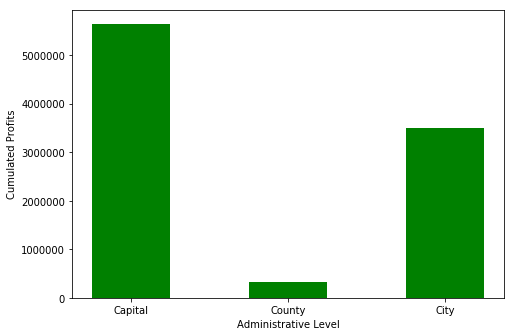

In [120]:
#4.1 Data Aggregation/Manipulation
capital_sum=rawdata_refined_pal['Profits'][rawdata_refined_pal['Administrative Level'] == 0].sum()
county_sum=rawdata_refined_pal['Profits'][rawdata_refined_pal['Administrative Level'] == 2].sum()
city_sum=rawdata_refined_pal['Profits'][rawdata_refined_pal['Administrative Level'] == 1].sum()

#4.1 Visualization
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Capital', 'County', 'City']
results = [capital_sum,county_sum,city_sum]
ax.bar(names,results,width=0.50,color='g')
plt.xlabel('Administrative Level')
plt.ylabel('Cumulated Profits')
plt.show()

In [121]:
#4.1 Data Aggregation - Satisfaction
print ('"Y" after LabelEncoder() is:',rawdata_refined_pal["Satisfaction"].iloc[0])
print ('"N" after LabelEncoder() is:',rawdata_refined_pal["Satisfaction"].iloc[11])

"Y" after LabelEncoder() is: 1
"N" after LabelEncoder() is: 0


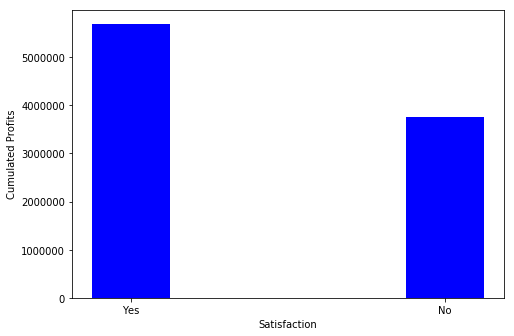

In [123]:
Y_sum=rawdata_refined_pal['Profits'][rawdata_refined_pal['Satisfaction'] == 1].sum()
N_sum=rawdata_refined_pal['Profits'][rawdata_refined_pal['Satisfaction'] == 0].sum()

#4.1 Visualization - Satisfaction
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['Yes', 'No']
results = [Y_sum,N_sum]
ax.bar(names,results,width=0.25,color='b')
plt.xlabel('Satisfaction')
plt.ylabel('Cumulated Profits')
plt.show()


In [135]:
#4.2
import numpy
rawdata_refined_pal['log_return']=numpy.log(rawdata_refined_pal.Profits)

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
print(rawdata_refined_pal['log_return'].min())

-inf


In [137]:
import numpy
rawdata_refined_pal=rawdata_refined_pal[~rawdata_refined_pal.isin([numpy.nan, numpy.inf, -numpy.inf]).any(1)]

(array([ 995., 1775., 2542., 5243., 6354., 5022., 2693.,  922.,  282.,
          30.]),
 array([-0.21072103,  0.8665968 ,  1.94391463,  3.02123246,  4.09855029,
         5.17586812,  6.25318596,  7.33050379,  8.40782162,  9.48513945,
        10.56245728]),
 <a list of 10 Patch objects>)

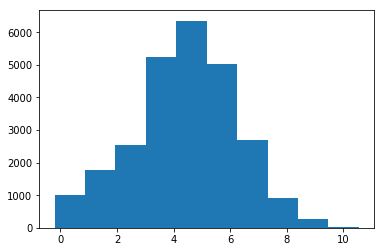

In [138]:
# Import matplotlib
import matplotlib.pyplot as plt
plt.hist(rawdata_refined_pal['log_return'])

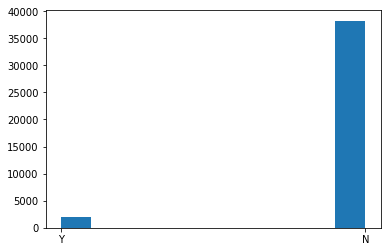

In [39]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = spark.read.load('./Sales_data/sales_en.csv',format='csv',header='true',inferSchema = True)
# Convert ‘Satisfaction’ to an array using Numpy and plot it using pyplot. 
SatisfactionArr = np.array(data.select('Satisfaction').collect())
plt.hist(SatisfactionArr)
plt.show()

In [37]:
spark= SparkSession.builder.getOrCreate()
df_sp = spark.createDataFrame(rawdata_refined_pal)